## Red wine data set

In [7]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold, LeaveOneOut, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, scale, StandardScaler
from tqdm import tqdm
import itertools
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, BaggingClassifier, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostRegressor
from numpy import mean
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import sqrt
from sklearn import tree

%matplotlib inline
plt.style.use('seaborn-white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [8]:
df = pd.read_csv("redwinequality.csv")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [9]:
df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 
                  'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
                  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',
                  }, inplace=True)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## EDA

<AxesSubplot:>

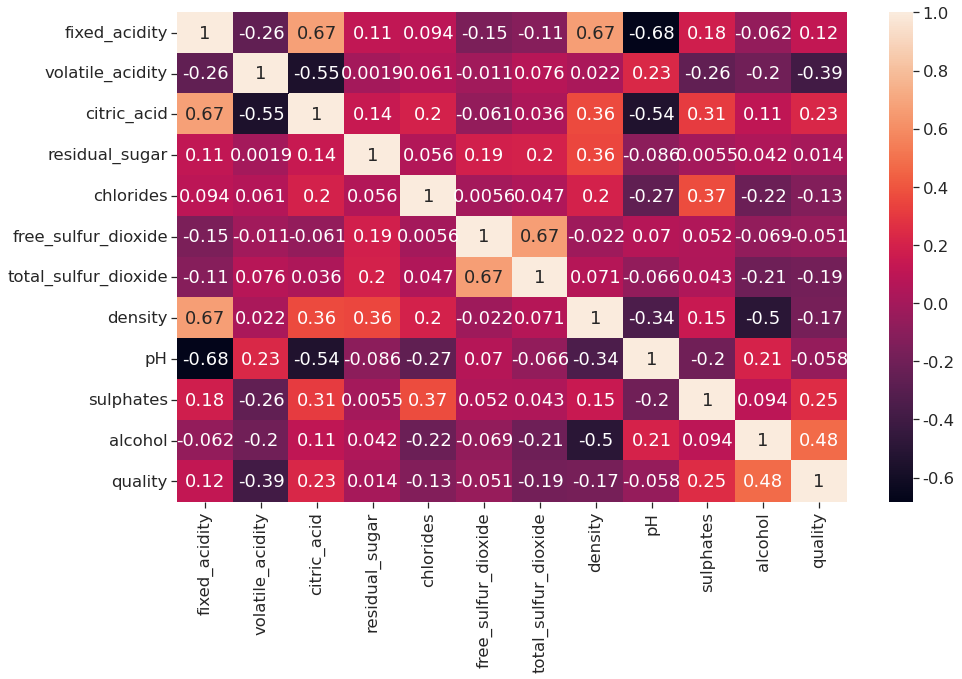

In [10]:
plt.figure(figsize=(15, 9))
corr=df.corr()
sns.heatmap(corr, annot=True)
#plt.xticks(rotation=45)


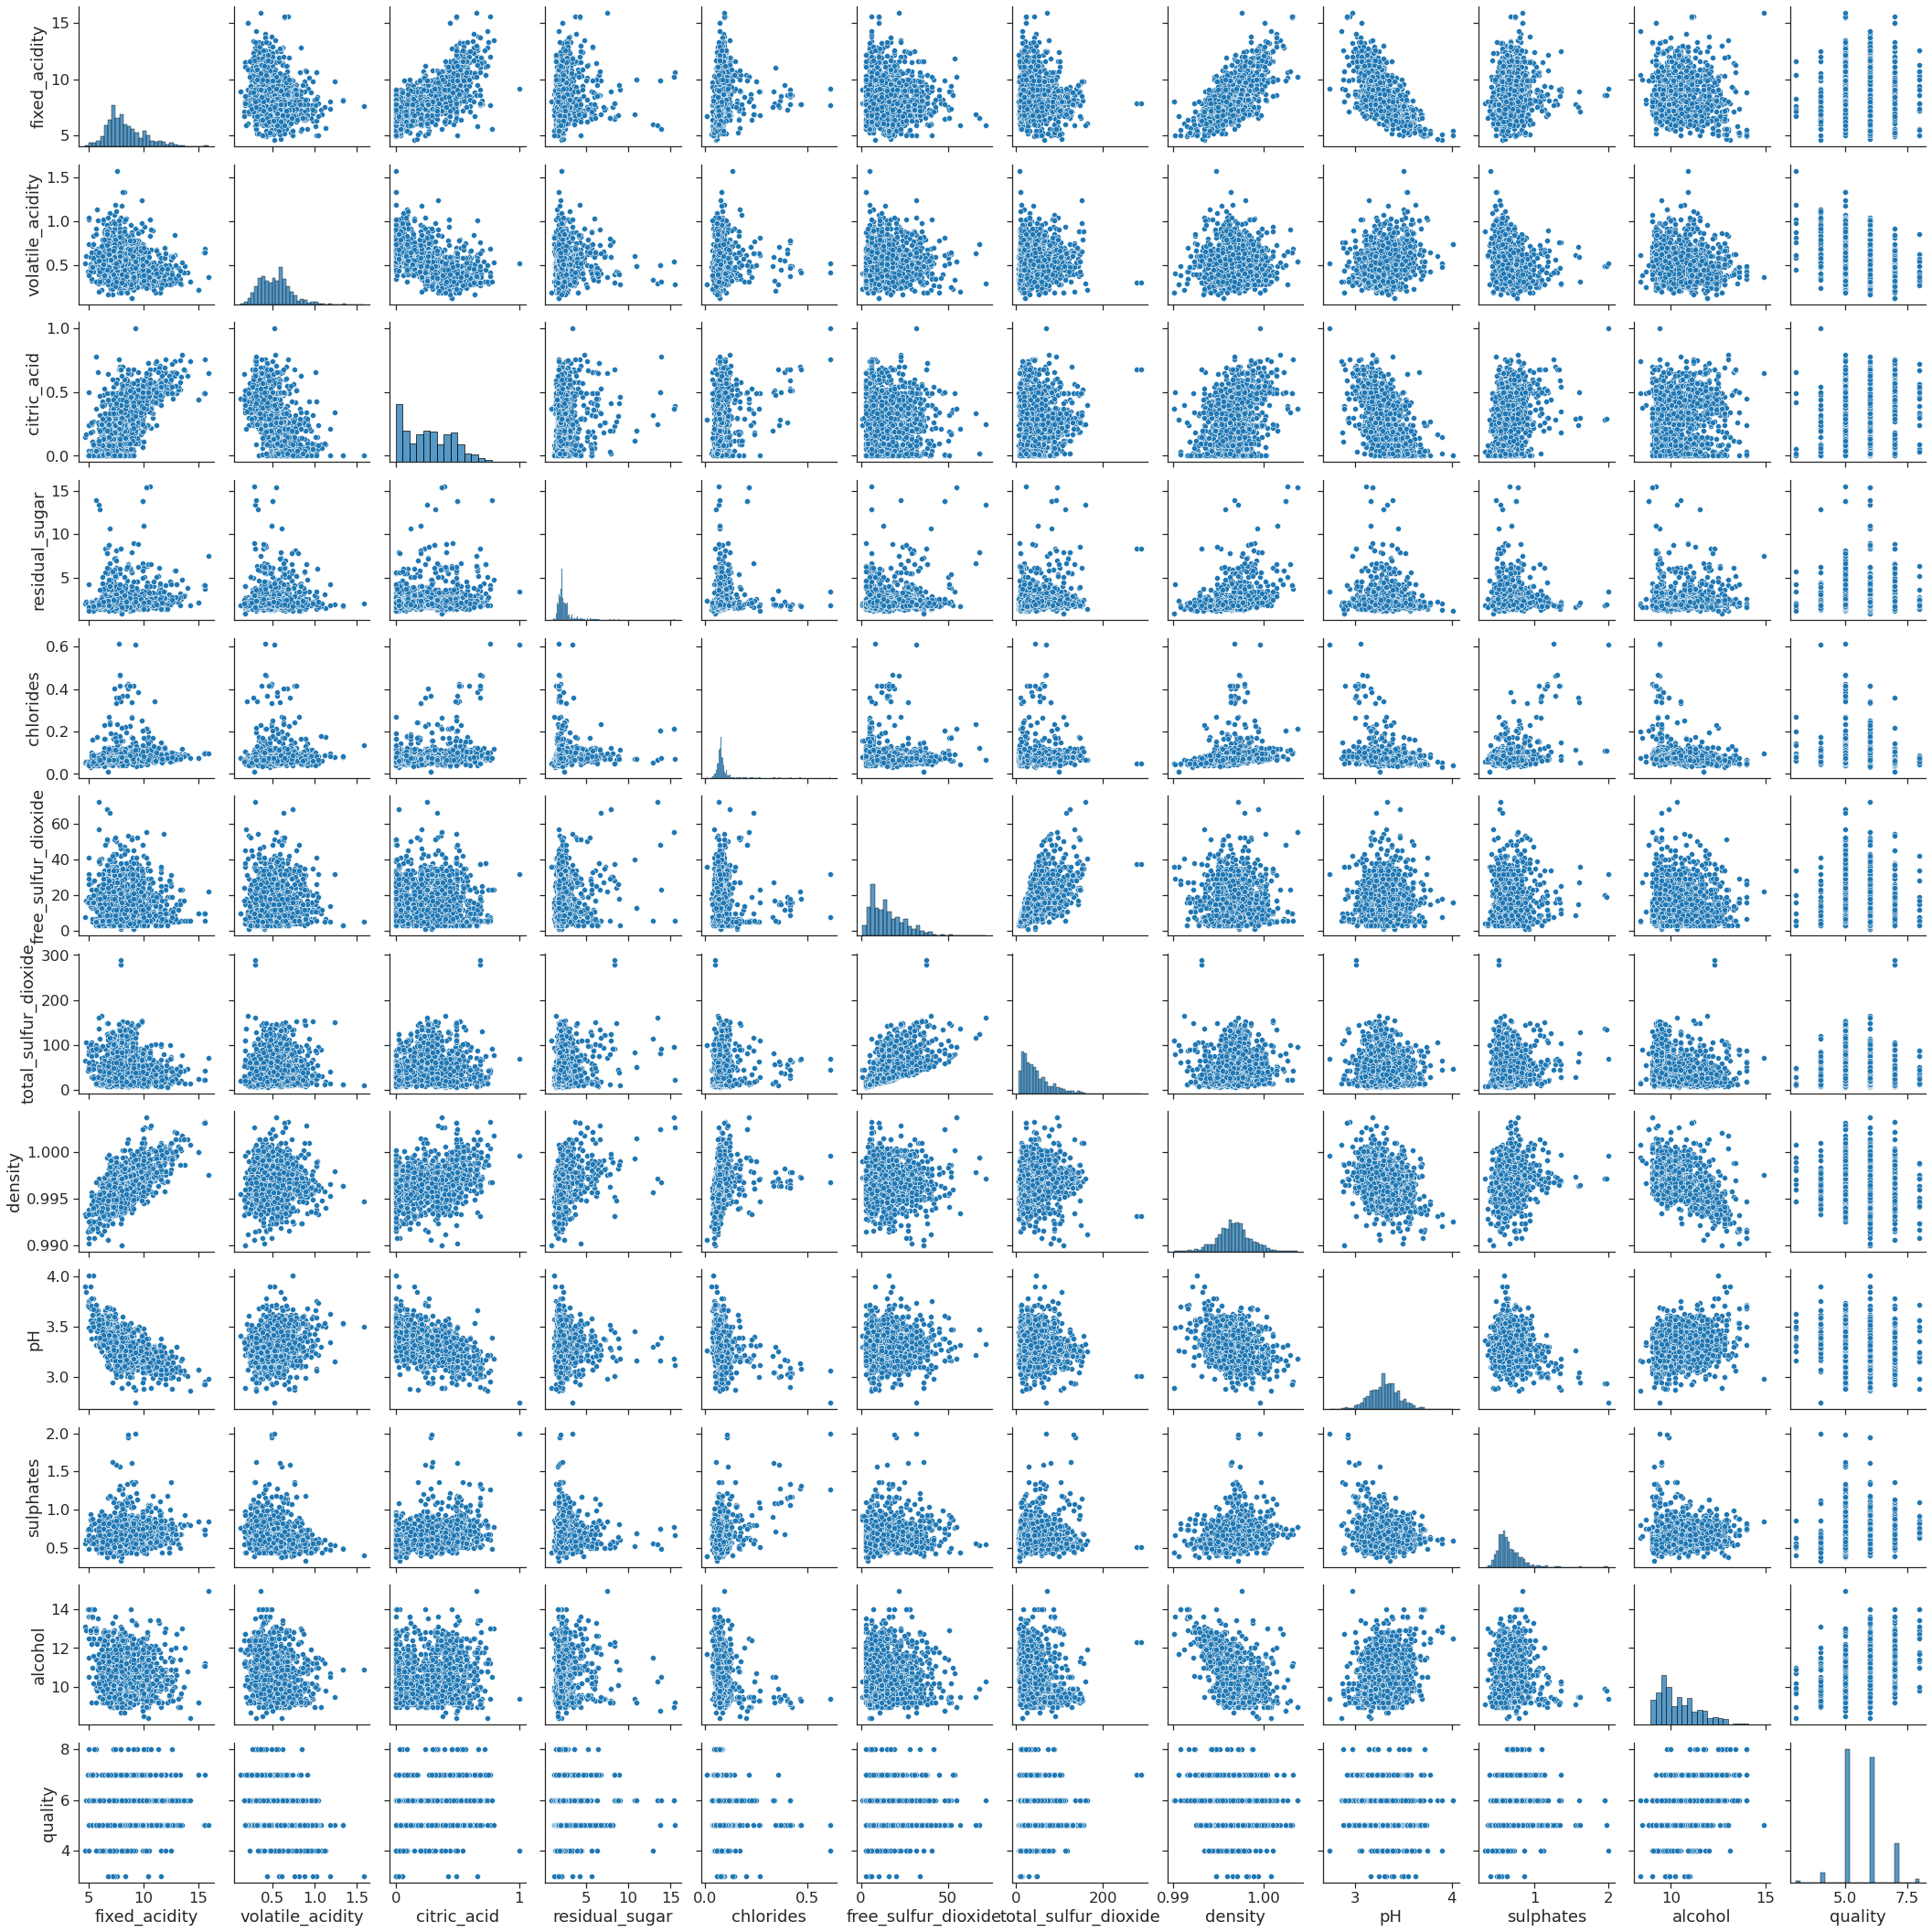

In [11]:
sns.pairplot(df)

## Linear regression

### Simple linear regression

In [12]:
a = smf.ols('quality~fixed_acidity', data=df).fit()
print(a.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     24.96
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           6.50e-07
Time:                        17:03:16   Log-Likelihood:                -1914.2
No. Observations:                1599   AIC:                             3832.
Df Residuals:                    1597   BIC:                             3843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.1573      0.098     52.684

In [13]:
b = smf.ols('quality~volatile_acidity', data=df).fit()
print(b.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     287.4
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           2.05e-59
Time:                        17:03:16   Log-Likelihood:                -1794.3
No. Observations:                1599   AIC:                             3593.
Df Residuals:                    1597   BIC:                             3603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5657      0.058  

In [14]:
c = smf.ols('quality~citric_acid', data=df).fit()
print(c.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     86.26
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           4.99e-20
Time:                        17:03:16   Log-Likelihood:                -1884.6
No. Observations:                1599   AIC:                             3773.
Df Residuals:                    1597   BIC:                             3784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.3817      0.034    159.610      

In [15]:
d = smf.ols('quality~residual_sugar', data=df).fit()
print(d.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3012
Date:                Sun, 09 Jan 2022   Prob (F-statistic):              0.583
Time:                        17:03:17   Log-Likelihood:                -1926.5
No. Observations:                1599   AIC:                             3857.
Df Residuals:                    1597   BIC:                             3868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6161      0.042    134.

In [16]:
e = smf.ols('quality~chlorides', data=df).fit()
print(e.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     26.99
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           2.31e-07
Time:                        17:03:17   Log-Likelihood:                -1913.2
No. Observations:                1599   AIC:                             3830.
Df Residuals:                    1597   BIC:                             3841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8295      0.042    137.852      0.0

In [17]:
f = smf.ols('quality~free_sulfur_dioxide', data=df).fit()
print(f.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.109
Date:                Sun, 09 Jan 2022   Prob (F-statistic):             0.0428
Time:                        17:03:17   Log-Likelihood:                -1924.6
No. Observations:                1599   AIC:                             3853.
Df Residuals:                    1597   BIC:                             3864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6981    

In [18]:
g = smf.ols('quality~total_sulfur_dioxide', data=df).fit()
print(g.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     56.66
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           8.62e-14
Time:                        17:03:17   Log-Likelihood:                -1898.8
No. Observations:                1599   AIC:                             3802.
Df Residuals:                    1597   BIC:                             3812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8472 

In [19]:
h = smf.ols('quality~density', data=df).fit()
print(h.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     50.41
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.87e-12
Time:                        17:03:17   Log-Likelihood:                -1901.8
No. Observations:                1599   AIC:                             3808.
Df Residuals:                    1597   BIC:                             3818.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.2385     10.508      7.636      0.0

In [20]:
i = smf.ols('quality~pH', data=df).fit()
print(i.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.340
Date:                Sun, 09 Jan 2022   Prob (F-statistic):             0.0210
Time:                        17:03:17   Log-Likelihood:                -1924.0
No. Observations:                1599   AIC:                             3852.
Df Residuals:                    1597   BIC:                             3863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6359      0.433     15.320      0.0

In [21]:
j = smf.ols('quality~sulphates', data=df).fit()
print(j.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.80e-24
Time:                        17:03:17   Log-Likelihood:                -1874.4
No. Observations:                1599   AIC:                             3753.
Df Residuals:                    1597   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8477      0.078     61.818      0.0

In [22]:
k = smf.ols('quality~alcohol', data=df).fit()
print(k.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           2.83e-91
Time:                        17:03:17   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.0

### Multiple linear regression

In [23]:
columns_selected = "+".join(df.columns.difference(["quality"]))
my_formula = "quality ~ " + columns_selected
est = smf.ols(my_formula,data = df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          1.79e-145
Time:                        17:03:17   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652 

In [24]:
X = df.drop("quality", axis=1)
y = df.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
print("The RMSE is: {:.5}".format(rmse))

The MAE is: 0.49692
The RMSE is: 0.64399


### Non-linear 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
# quadratic polynomial
poly = PolynomialFeatures(2, include_bias=False)
poly.fit(X_train)
X_train_quad = poly.transform(X_train)
X_test_quad = poly.transform(X_test)

lr_model.fit(X_train_quad,y_train)
pred = lr_model.predict(X_test_quad)

print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

The MAE is: 0.5013
The RMSE is: 0.65641


In [27]:
#cubic polynomial
poly = PolynomialFeatures(3, include_bias=False)
poly.fit(X_train)
X_train_cubic = poly.transform(X_train)
X_test_cubic = poly.transform(X_test)

lr_model.fit(X_train_cubic,y_train)
pred = lr_model.predict(X_test_cubic)

print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

The MAE is: 0.87594
The RMSE is: 2.5209


### Interaction term

In [28]:
## lm + interaction term
### 2-order interaction term (all variable)
#lmInter_fit <- lm(quality~(.)^2, data=train)
#lmInter_predict <- predict(lmInter_fit, test)
#mae(test$quality, lmInter_predict)    # 0.531
#rmse(test$quality, lmInter_predict)    # 0.691

## Resampling methods

### LOOCV

In [29]:
loocv = LeaveOneOut()
loocv.get_n_splits(X)  #可以想成自動幫你切

1599

In [30]:
error_list = []
for power in tqdm(range(1, 6)):
    poly = PolynomialFeatures(power,include_bias=False)
    X2 = poly.fit_transform(X)  
    lr = LinearRegression()
    # for LOOCV, the number of folds be will n = size of data
    error_list.append(-1 * cross_val_score(lr, X2, y, cv = len(X), n_jobs=-1, scoring = 'neg_mean_absolute_error').mean())
    
    error_list1 = []
for power in tqdm(range(1, 6)):
    poly = PolynomialFeatures(power,include_bias=False)
    X2 = poly.fit_transform(X)  
    lr = LinearRegression()
    # for LOOCV, the number of folds be will n = size of data
    error_list1.append(-1 * cross_val_score(lr, X2, y, cv = len(X), n_jobs=-1, scoring = 'neg_root_mean_squared_error').mean())

  0%|          | 0/5 [00:00<?, ?it/s]


ValueError: 'neg_root_mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
pd.DataFrame({"DEGREE":np.arange(1, 6),"MAE":error_list, "RMSE":error_list1})

### K-fold

In [ ]:
lr = LinearRegression()
error_list_mae = []
error_list_rmse = []

kf_5 = KFold(n_splits=5, shuffle=True, random_state=1)
for power in tqdm(range(1, 6)):
    poly = PolynomialFeatures(power, include_bias=False)
    X2 = poly.fit_transform(X)
    error_list_mae.append(-1 * cross_val_score(lr, X2, y, cv=kf_5, n_jobs=5, scoring='neg_mean_squared_error').mean())
    error_list_rmse.append(-1 * cross_val_score(lr, X2, y, cv=kf_5, n_jobs=5, scoring='neg_root_mean_squared_error').mean())

print('5 FOLD CV')
pd.DataFrame({"DEGREE":np.arange(1, 6), "MAE":error_list_mae, "RMSE":error_list_rmse})

In [ ]:
lr = LinearRegression()
error_list_mae = []
error_list_rmse = []

kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
for power in tqdm(range(1, 6)):
    poly = PolynomialFeatures(power, include_bias=False)
    X2 = poly.fit_transform(X)
    error_list_mae.append(-1*cross_val_score(lr, X2, y, cv=kf_10, n_jobs=-1, scoring='neg_mean_squared_error').mean())
    error_list_rmse.append(-1*cross_val_score(lr, X2, y, cv=kf_10, n_jobs=-1, scoring='neg_root_mean_squared_error').mean())

print('10 FOLD CV')
pd.DataFrame({"DEGREE":np.arange(1, 6), "MAE":error_list_mae, "RMSE":error_list_rmse})

## Selection methods

### Best subset selection

In [ ]:
def get_models(k_features, X, y):
    """
    Fit all possible models that contain exactly k_features predictors.
    X is predictor and y is target or response.
    """

    n_features = X.shape[1]

    X_combos = itertools.combinations(list(X.columns), k_features)

    best_score = np.inf

    for X_label in X_combos:
        X_smf = ' + '.join(X_label)
        f     = 'quality ~ {}'.format(X_smf)
        # Fit model
        lin_reg = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        score = lin_reg.ssr
        if score < best_score:
            best_score, best_subset = score, X_label
            best_reg = lin_reg


    return best_score, best_reg, best_subset



# get all model results
rss = []
sub = []
reg = []
kft = []

for i in range(1, 12):
    best_score, best_reg, best_subset = get_models(i, X, y)
    
    rss.append(best_score)
    sub.append(best_subset)
    reg.append(best_reg)
    kft.append(i)
    print('Progess: i = {}, done'.format(i))

In [ ]:
results = pd.DataFrame({'kft': kft, 'rss': rss, 'reg': reg, 'sub': sub},
                           columns = ['rss', 'reg', 'sub', 'kft']).set_index('kft')

results

In [ ]:
plt.figure(figsize=(15, 9))
plt.rcParams.update({'font.size': 14, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
ax = sns.lineplot(x = "kft", y = "rss", data = results)
ax.set_xlabel('# Predictors')
ax.set_ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

#plot2:adjusted r^2 
results["rsquared_adj"] = results.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
ax = sns.lineplot(x = "kft", y = "rsquared_adj", data = results)
plt.plot(results["rsquared_adj"].argmax()+1, results["rsquared_adj"].max(), "or")
ax.set_xlabel('# Predictors')
ax.set_ylabel('adjusted rsquared')

results["aic"] = results.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
ax = sns.lineplot(x = "kft", y = "aic", data = results)
plt.plot(results["aic"].argmin()+1, results["aic"].min(), "or")
ax.set_xlabel('# Predictors')
ax.set_ylabel('AIC')

results["bic"] = results.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
ax = sns.lineplot(x = "kft", y = "bic", data = results)
plt.plot(results["bic"].argmin()+1, results["bic"].min(), "or")
ax.set_xlabel('# Predictors')
ax.set_ylabel('BIC')

In [ ]:
results['sub'][7]

### Forward selection

In [ ]:
def processSubset(X_label):
    # Fit model on feature_set and calculate RSS
    X_smf = ' + '.join(X_label)
    f     = 'quality ~ {}'.format(X_smf)
    # Fit model
    lin_reg = smf.ols(formula=f, data=pd.concat([X_train, y_train], axis=1)).fit()
    RSS = lin_reg.ssr
    return {'model': lin_reg, 'RSS': RSS}

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]

    # Return the best model, along with some other useful information about the model
    return best_model



In [ ]:
models2 = pd.DataFrame(columns=['RSS', 'model'])

predictors = [] # we start with null model M0

for i in range(1,len(X_train.columns)+1):
    models2.loc[i] = forward(predictors)
    exog = models2.loc[i]['model'].model.exog_names.copy()
    exog.remove('Intercept') #smf will automatically adds intercept
    predictors = exog
    print(i, predictors)

In [ ]:
bic_f = []

for m in models2.model:
    bic_f.append(m.bic)
    
np.array(bic_f).argmin()

In [ ]:
aic_f = []

for m in models2.model:
    aic_f.append(m.aic)
    
np.array(aic_f).argmin()

In [ ]:
print(models2['model'][6].model.exog_names[1:]) # Do not print Intercept

### Backward selection

In [ ]:
def backward(predictors):
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]

    return best_model

In [ ]:
models3 = pd.DataFrame(columns=['RSS', 'model'], index = range(1, len(X_train.columns)))

predictors = X_train.columns # we start with full model Mp
models3.loc[len(predictors)] = processSubset(predictors)

while(len(predictors) > 1):  
    models3.loc[len(predictors)-1] = backward(predictors)
    exog = models3.loc[len(predictors)-1]['model'].model.exog_names.copy()
    exog.remove('Intercept')
    predictors = exog
    print(len(predictors), predictors)

In [ ]:
print(models3['model'][6].model.exog_names[1:])

In [ ]:
bic_b = []

for m in models3.model:
    bic_b.append(m.bic)
    
np.array(bic_b).argmin()

In [ ]:
aic_b = []

for m in models3.model:
    aic_b.append(m.aic)
    
np.array(aic_b).argmin()

In [ ]:
print(models3['model'][6].model.exog_names[1:])

### estimate error (Python)

## 這邊的話(因為下面結果怪怪的)：巨量放 R 的結果，ISLR 不要放 error

#### best subset selection

In [ ]:
def get_test_mae(k_features, X_train, y_train, X_test, y_test):
    
    n_features = X_train.shape[1]
    
    X_combos = itertools.combinations(list(X_train.columns), k_features)
     
    for X_label in X_combos:
        X_smf = ' + '.join(X_label)
        f     = 'quality ~ {}'.format(X_smf)
        # Fit model
        lin_reg = smf.ols(formula=f, data=pd.concat([X_train, y_train], axis=1)).fit()
        y_pred = lin_reg.predict(X_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        
    return mae

In [ ]:
# get all model results
mae = []
kft = []

for i in range(1, 12):
    test_mae = get_test_mae(i, X_train, y_train, X_test, y_test)
    
    mae.append(test_mae)
    kft.append(i)
    
    print('Progess: i = {}, done'.format(i))

In [ ]:
test_set_mae = pd.DataFrame({'kft': kft, 'mae': mae},
                           columns = ['mae', 'kft']).set_index('kft')
test_set_mae

In [ ]:
ax = sns.lineplot(x = "kft", y = "mae", data = test_set_mae)
ax.set_xlabel('# Predictors')
ax.set_ylabel('MAE')

In [ ]:
# 獨自挑出來的結果跑 lm
#best subset selection
X_for = df.drop(columns = ['quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'density'], axis=1)
y_for = df.quality
X_train_for, X_test_for, y_train_for, y_test_for = train_test_split(X_for, y_for, test_size=0.3, random_state=1)
lr_model = LinearRegression()
lr_model.fit(X_train_for, y_train_for)
pred = lr_model.predict(X_test_for)
mse = mean_squared_error(y_test_for, pred)
rmse = np.sqrt(mse)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test_for, pred)))
print("The RMSE is: {:.5}".format(rmse))

* summary:best subset selection 在 8 個 predictors 時有最好的 MAE = 0.483791

#### forward selection

* 這邊用 R 跑 -> 有直接的 rmse 結果

In [ ]:
# model <- lm(quality~., data=df)
# best subset selection
# ols_step_best_subset(model)   #MAE=0.48, rmse=0.6477
# ols_step_forward_p(model, details = TRUE)  #MAE=0.51, rmse= 0.6477
# ols_step_backward_p(model, details = TRUE)  #MAE=0.501, rmse= 0.6477

In [ ]:
#forward selection
X_for = df.drop(columns = ['quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'density'], axis=1)
y_for = df.quality
X_train, X_test, y_train, y_test = train_test_split(X_for, y_for, test_size=0.3, random_state=1)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
print("The RMSE is: {:.5}".format(rmse))


#### backward selection

In [ ]:
#backward selection
X_for = df.drop(columns = ['quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'density'], axis=1)
y_for = df.quality
X_train_for, X_test_for, y_train_for, y_test_for = train_test_split(X_for, y_for, test_size=0.3, random_state=1)
lr_model = LinearRegression()
lr_model.fit(X_train_for, y_train_for)
pred = lr_model.predict(X_test_for)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test_for, pred)))
print("The RMSE is: {:.5}".format(rmse))


#### R result(result 幫忙到R截)

In [ ]:
# model <- lm(quality~., data=df)
# best subset selection
# ols_step_best_subset(model)   #MAE=0.48, rmse=0.6477
# ols_step_forward_p(model, details = TRUE)  #MAE=0.51, rmse= 0.6477
# ols_step_backward_p(model, details = TRUE)  #MAE=0.501, rmse= 0.6477

## Shrinkage method

### Lasso

In [ ]:
alphas = 10 ** np.linspace(10, -2, 100)
lasso = Lasso(max_iter=1000)
coefs = []

for a in alphas:   #alphas = 10 ** np.linspace(10, -2, 100)
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)


#畫成圖
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scale = scaler.transform(X_train)
X_scale_t = scaler.transform(X_test)

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
lassocv = LassoCV(alphas=None, cv=kf, max_iter=10000)
lassocv.fit(X_scale, y_train.values.ravel())

lassocv.alpha_
lasso = Lasso(max_iter=10000)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
train_pred = lasso.predict(X_scale)
pred = lasso.predict(X_scale_t)

print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

### Ridge regression

In [ ]:
alphas = 10 ** np.linspace(10, -2, 100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)    #Set the parameters of this estimator
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)   #Weight vector

ax = plt.gca()    #Get the current Axes, creating one if necessary
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])     #reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')

In [ ]:
validation_score = []
kf = KFold(n_splits=10, shuffle=True, random_state=1)
alphas = 10 ** np.linspace(10, -2, 100)
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=kf)
ridgecv.fit(X_scale, y_train)
pred = ridgecv.predict(X_scale_t)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

## Tree-based method

### Regression Tree

#### K = 5

best tree size =  40


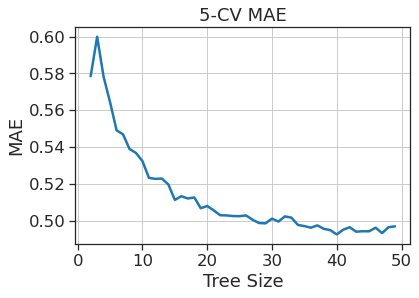

In [33]:
tree_sizes = range(2, 50)

k = 5
kf5 = KFold(n_splits=k, shuffle=True, random_state=1)

MAE_scores = []

for size in tree_sizes:
    reg_tree = DecisionTreeRegressor(max_leaf_nodes=size, random_state=1)
    MAE_s = -cross_val_score(reg_tree, X, y, cv=kf5, scoring='neg_mean_absolute_error')
    MAE_scores.append(np.mean(MAE_s))

print("best tree size = ", tree_sizes[np.argmin(MAE_scores)])

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MAE_scores)
plt.title('5-CV MAE')
plt.xlabel('Tree Size')
plt.ylabel('MAE')
plt.grid(True)

The MAE is: 0.54043
The RMSE is: 0.67484


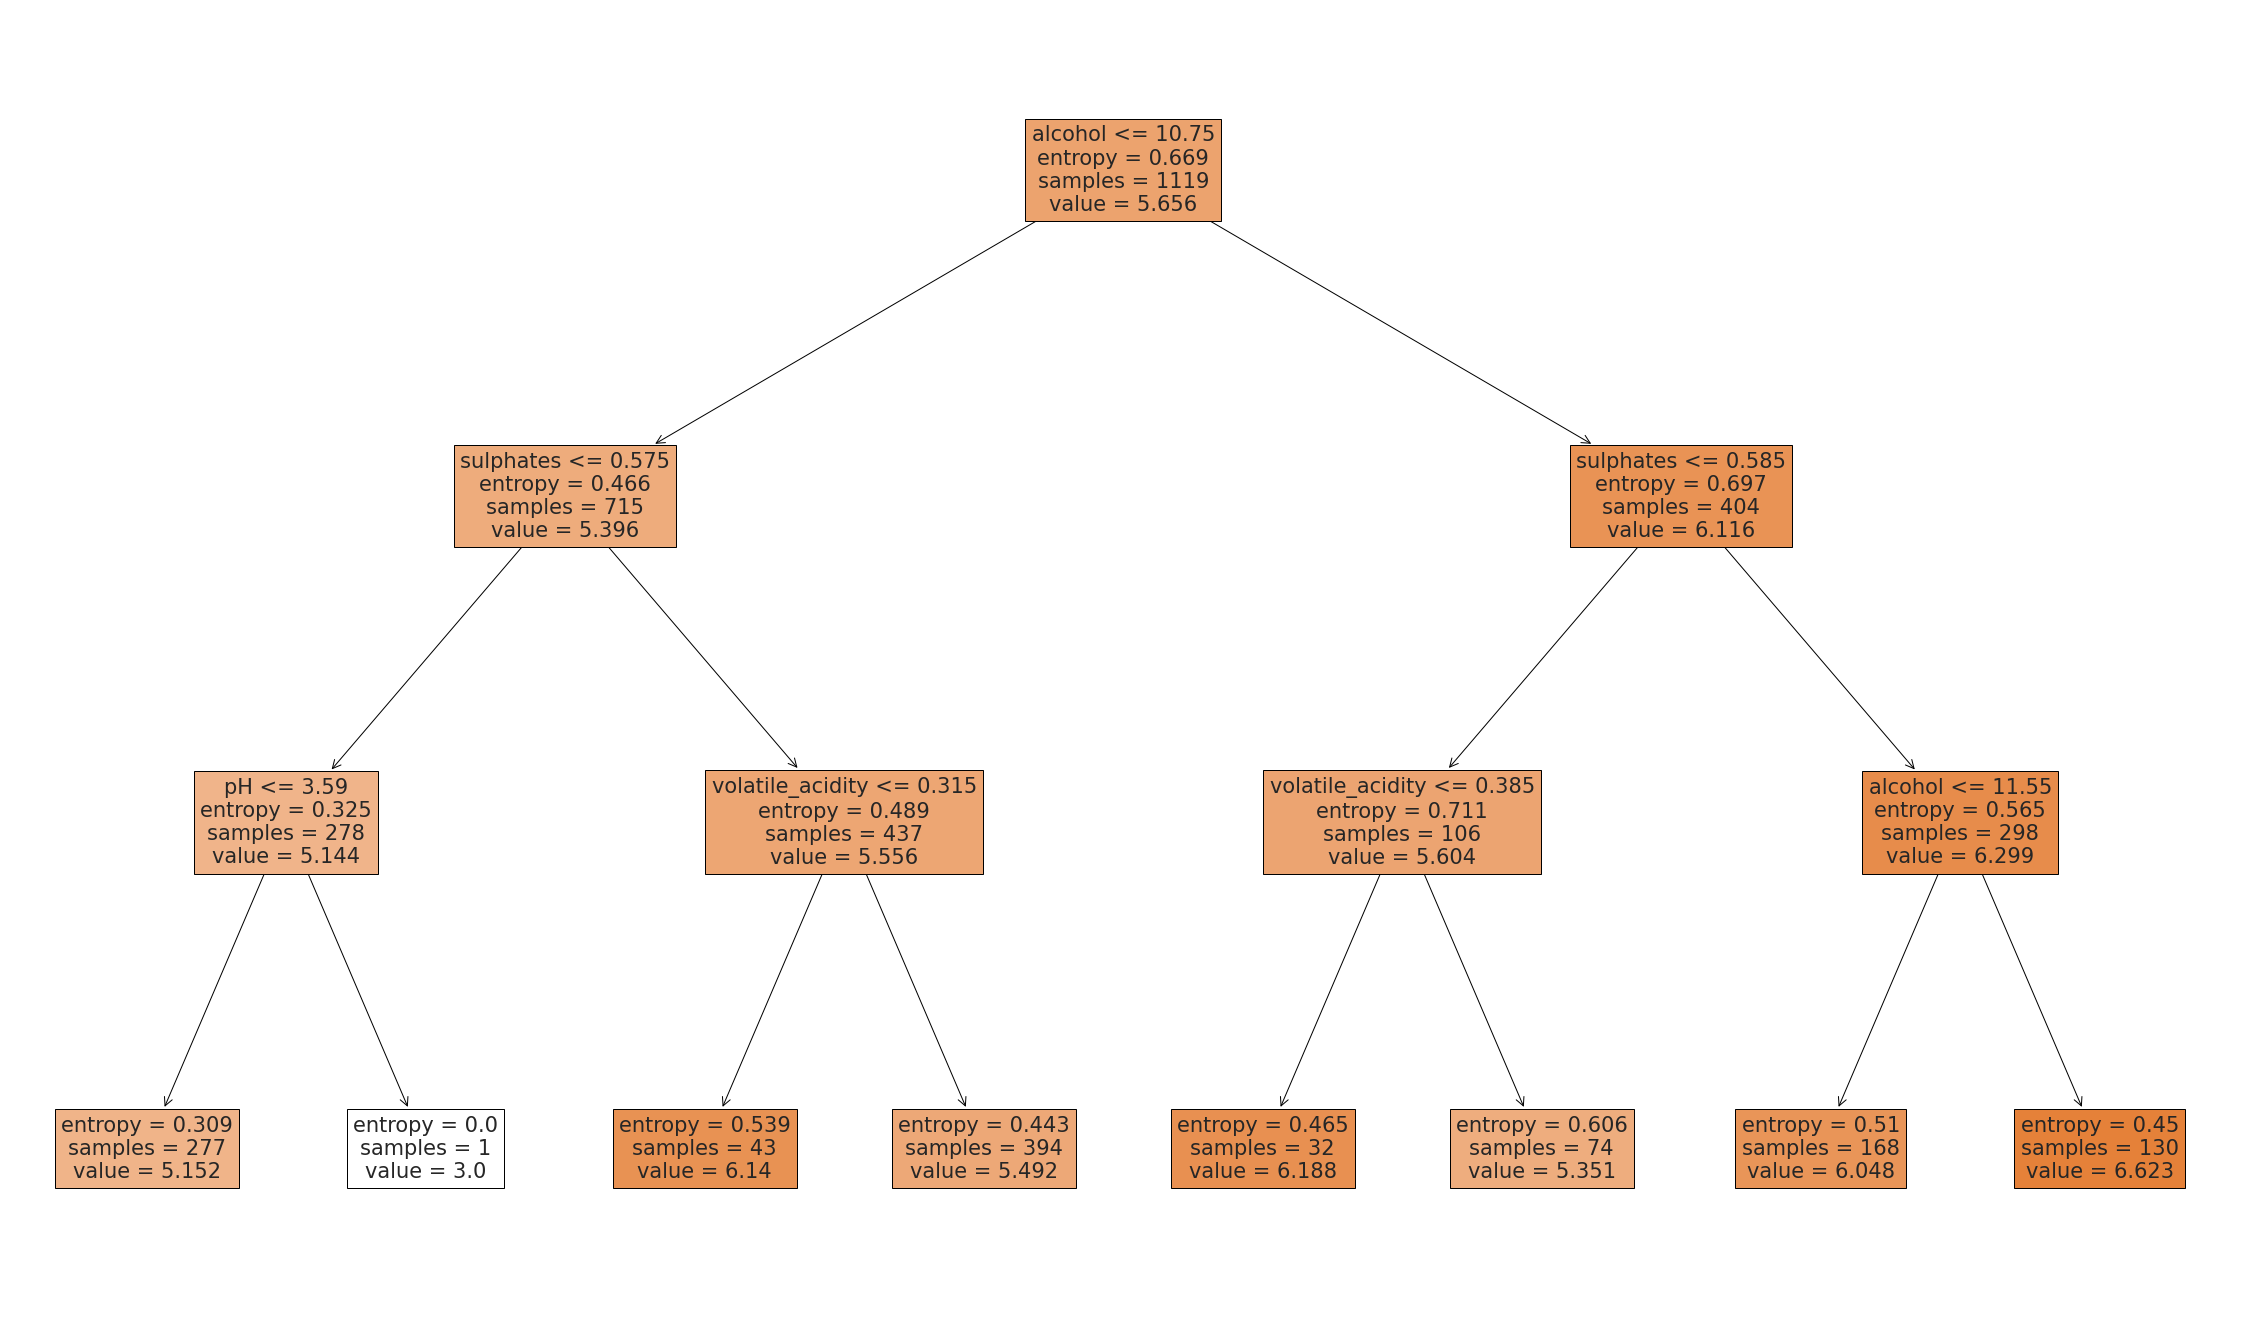

In [36]:
reg_tree = DecisionTreeRegressor( max_depth=3, random_state=1)
reg_tree.fit(X_train, y_train)
pred = reg_tree.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

plt.figure(figsize=(40, 24))
tree.plot_tree(reg_tree, feature_names=X.columns,  
                    class_names=['No','Yes'],
                    filled=True)
plt.show()

#### K = 10

In [ ]:
tree_sizes = range(2, 50)

k = 10
kf10 = KFold(n_splits=k, shuffle=True, random_state=1)

MAE_scores1 = []

for size in tree_sizes:
    reg_tree = DecisionTreeRegressor(max_leaf_nodes=size, random_state=1)
    MAE_s1 = -cross_val_score(reg_tree, X, y, cv=kf10, scoring='neg_mean_absolute_error')
    MAE_scores1.append(np.mean(MAE_s1))

print("best tree size = ", tree_sizes[np.argmin(MAE_scores1)])

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MAE_scores1)
plt.title('10-CV MAE')
plt.xlabel('Tree Size')
plt.ylabel('MAE')
plt.grid(True)

In [ ]:
reg_tree = DecisionTreeRegressor(max_leaf_nodes=49, random_state=1)
reg_tree.fit(X_train, y_train)
pred = reg_tree.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

plt.figure(figsize=(40, 24))
tree.plot_tree(reg_tree, feature_names=X.columns,  
                    class_names=['No','Yes'],
                    filled=True)
plt.show()

#### 解釋 (max_depth=3, min_samples_leaf=5)

In [ ]:
reg_tree1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=1)
reg_tree1.fit(X_train, y_train)
pred = reg_tree1.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

plt.figure(figsize=(40,24))
tree.plot_tree(reg_tree1, feature_names=X.columns,  
                    class_names=['No','Yes'],
                    filled=True)
plt.show()

### Bagging

* n_estimators=10

In [ ]:
bagging = BaggingRegressor(n_estimators=10, random_state=1)
bagging.fit(X_train,y_train)
pred = bagging.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

In [ ]:
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f' % -(mean(n_scores)))

* n_estimators=100

In [ ]:
bagging = BaggingRegressor(n_estimators=100, random_state=1)
bagging.fit(X_train,y_train)
pred = bagging.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

* n_estimators=1000

In [ ]:
bagging = BaggingRegressor(n_estimators=1000, random_state=1)
bagging.fit(X_train,y_train)
pred = bagging.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

* 各種 n_estimator + kfold

In [ ]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingRegressor(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print("%s trees' MAE %.3f " % (name, -mean(scores)))

In [ ]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingRegressor(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print("%s trees' RMSE %.3f " % (name, -mean(scores)))

#### variable imporatance

* Based on n_estimators = 100 (only RandomForestRegressor have)

In [ ]:
# Bagging: using all features
X = df.drop("quality", axis=1)
y = df.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
max_features = X.shape[1]
tree_count   = 100

#alogorithm
regr1 = RandomForestRegressor(max_features=max_features, random_state=1, n_estimators=tree_count)

#fit
regr1.fit(X_train, y_train)

#predict
pred = regr1.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

In [ ]:
Importance = pd.DataFrame({'Importance':regr1.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### Random forest

* 這邊用 R 跑

In [ ]:
# 11 / 3 ~~ 4 
# Bagging: using all features
X = df.drop("quality", axis=1)
y = df.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree_count = 100

#alogorithm
regr2 = RandomForestRegressor(max_features=4, random_state=1, n_estimators=tree_count)

#fit
regr2.fit(X_train, y_train)

#predict
pred = regr2.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))



### boosting

In [ ]:
params = {'n_estimators': 550, 'max_depth': 15, 
          'min_samples_split': 3, 'max_features': 4, 
          'subsample' : 1,'learning_rate': 0.03, 
          'random_state': 1}

#apply
regr3   = GradientBoostingRegressor(**params)
regr3.fit(X_train, y_train)

#predict
pred = regr3.predict(X_test)
print("The MAE is: {:.5}".format(metrics.mean_absolute_error(y_test, pred)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("The RMSE is: {:.5}".format(rmse))

#### feature imporatance

In [ ]:
feature_importance = regr3.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## XGBoost

In [ ]:
#XGB

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

df = pd.read_csv('./Data/redwinequality.csv')


X = df.drop(columns=['quality'])
y = df[['quality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 建立 XGBClassifier 模型
xgboostModel = XGBRegressor(n_estimators=15, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train.values.ravel())
# 使用訓練資料預測分類
predicted_train = xgboostModel.predict(X_train)
predicted_test = xgboostModel.predict(X_test)

print('XGB training MSE is : {:.5}'.format(mean_absolute_error(predicted_train, y_train)))
print('XGB testing MSE is : {:.5}'.format(mean_absolute_error(predicted_test, y_test)))
print('XGB training RMSE is : {:.5}'.format(sqrt(mean_squared_error(predicted_train, y_train))))
print('XGB testing RMSE is : {:.5}'.format(sqrt(mean_squared_error(predicted_test, y_test))))

## Ada boost

In [ ]:
#Ada boost

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=50)
regr.fit(X_train, y_train.values.ravel())
predicted_train = regr.predict(X_train)
predicted_test = regr.predict(X_test)
print('Ada training MAE is : {:.5}'.format(mean_absolute_error(predicted_train, y_train)))
print('Ada testing MAE is : {:.5}'.format(mean_absolute_error(predicted_test, y_test)))
print('Ada training RMSE is : {:.5}'.format(sqrt(mean_squared_error(predicted_train, y_train))))
print('Ada testing RMSE is : {:.5}'.format(sqrt(mean_squared_error(predicted_test, y_test))))

## MLP

In [ ]:
# -*- coding: utf-8 -*-
# pytorch mlp for multiclass classification
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.optim import SGD, Adam, AdamW
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn import Linear, ReLU, Softmax, Module, CrossEntropyLoss, Dropout, Sigmoid, MSELoss, L1Loss
from torch.nn.init import kaiming_uniform_, xavier_uniform_
import torch
from math import sqrt
# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        df.dropna(inplace=True)
        # store the inputs and outputs
        self.X = df.values[1:, :-1]
        self.y = df.values[1:, -1]
        print(self.X)
        print(self.y)
        # ensure input data is floats
        self.X = self.X.astype('float')
        self.y = self.y.astype('float')
        # label encode target and ensure the values are floats
#         self.y = LabelEncoder().fit_transform(self.y)
        # self.y = LabelBinarizer().fit_transform(self.y)
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
    # get indexes for train and test rows
    def get_splits(self, n_test=0.3):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])
# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 64)
#         kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.drop1 = Dropout()
        # second hidden layer
        self.hidden2 = Linear(64, 64)
#         kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.drop2 = Dropout()
        # third hidden layer and output
        self.hidden3 = Linear(64, 32)
#         kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act3 = ReLU()
        self.drop3 = Dropout()
        self.hidden4 = Linear(32, 1)
#         xavier_uniform_(self.hidden3.weight)
#         self.act4 = Softmax(dim=1)
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.drop1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.drop2(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.drop3(X)
        # output layer
        X = self.hidden4(X)
#         X = self.act4(X)
        return X
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=64, shuffle=True)
    test_dl = DataLoader(test, batch_size=64, shuffle=False)
    return train_dl, test_dl
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = L1Loss()
    # optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    optimizer = AdamW(model.parameters(), lr=0.005)
    # enumerate epochs
    for epoch in range(1500):#100:1.7 200:1.2 500:0.758 1000:0.722 1500:0.843  /// #1000:MSE: 0.783 RMSE: 0.885   #1500:MSE: 0.532 RMSE: 0.730
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
#             targets = targets.long()
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs.float())
            # calculate loss
            loss = criterion(yhat.float(), targets.float())
            # credit assignment
            loss.backward()
#             print("epoch: {}, batch: {}, loss: {}".format(epoch, i, loss.data))
            # update model weights
            optimizer.step()
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        criterion = L1Loss()
        yhat = model(inputs.float())
        loss = criterion(yhat.float(), targets.float())
#         print(yhat)
#         print(loss)
    return loss
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
#     yhat = yhat.detach().numpy()
    return yhat
# prepare the data
path = './Data/redwinequality.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(11)
print(model)
# train the model
train_model(train_dl, model)
# evaluate the model
loss = evaluate_model(test_dl, model)
print('MAE: %.3f' % loss)
# print('RMSE: %.3f' % sqrt(loss))

In [ ]:
# MLP testing

# -*- coding: utf-8 -*-
# pytorch mlp for multiclass classification
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.optim import SGD, Adam, AdamW
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn import Linear, ReLU, Softmax, Module, CrossEntropyLoss, Dropout, Sigmoid, MSELoss
from torch.nn.init import kaiming_uniform_, xavier_uniform_
import torch
from math import sqrt

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        df.dropna(inplace=True)
        # store the inputs and outputs
        self.X = df.values[1:, :-1]
        self.y = df.values[1:, -1]
        print(self.X)
        print(self.y)
        # ensure input data is floats
        self.X = self.X.astype('float')
        self.y = self.y.astype('float')
        # label encode target and ensure the values are floats
#         self.y = LabelEncoder().fit_transform(self.y)
        # self.y = LabelBinarizer().fit_transform(self.y)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.3):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])


# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 64)
#         kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.drop1 = Dropout()
        # second hidden layer
        self.hidden2 = Linear(64, 64)
#         kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.drop2 = Dropout()
        # third hidden layer and output
        self.hidden3 = Linear(64, 32)
#         kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act3 = ReLU()
        self.drop3 = Dropout()
        self.hidden4 = Linear(32, 1)
#         xavier_uniform_(self.hidden3.weight)
        self.act4 = ReLU()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.drop1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.drop2(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.drop3(X)
        # output layer
        X = self.hidden4(X)
#         X = self.act4(X)
        return X


# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=64, shuffle=True)
    test_dl = DataLoader(test, batch_size=64, shuffle=False)
    return train_dl, test_dl


# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = MSELoss()
    # optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    optimizer = AdamW(model.parameters(), lr=0.005)
    # enumerate epochs
    for epoch in range(1500):#100:1.7 200:1.2 500:0.758 1000:0.722 1500:0.843  /// #1000:MSE: 0.783 RMSE: 0.885   #1500:MSE: 0.532 RMSE: 0.730
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
#             targets = targets.long()
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs.float())
            # calculate loss
            loss = criterion(yhat.float(), targets.float())
            # credit assignment
            loss.backward()
#             print("epoch: {}, batch: {}, loss: {}".format(epoch, i, loss.data))
            # update model weights
            optimizer.step()


# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        criterion = MSELoss()
        yhat = model(inputs.float())
        loss = criterion(yhat.float(), targets.float())
#         print(yhat)
#         print(loss)
    return loss


# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
#     yhat = yhat.detach().numpy()
    return yhat


# prepare the data
path = './Data/redwinequality.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(11)
print(model)
# train the model
train_model(train_dl, model)
# evaluate the model
loss = evaluate_model(test_dl, model)
print('MLP testing MSE: %.3f' % loss)
print('MLP testing RMSE: %.3f' % sqrt(loss))

## Unsupervised learning(待修改)

### PCA

In [ ]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

In [ ]:
pca = PCA()
pca.fit(df_scale)

In [ ]:
#loading vectors
pd.DataFrame(pca.components_,columns = df.columns,index = ['PC1','PC2','PC3','PC4',"PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"]).T

In [ ]:
# getting the points in principal components
X_reduced = pca.transform(df_scale)
print(X_reduced.shape)
df = pd.DataFrame(X_reduced ,columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"])
df.head()

In [ ]:
pca.explained_variance_ 

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# Percentage of Variance Explained (PVE) by each PC:
plt.figure(figsize=(10, 8))
plt.ylim(0, 1.05)
index = np.arange(pca.components_.shape[0])
plt.bar(index, height=pca.explained_variance_ratio_ , width=0.3, align='center', 
        label='percentage of variance explained')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-', label='cumulative PVE')

plt.ylabel('percentage of variance explained')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

### NMF

In [ ]:
#  NMF
kf = KFold(n_splits=5, shuffle=True, random_state=1)
train_rmse_ = []
train_mae_ = []
val_rmse_ = []
val_mae_ = []

#  PC value update
for i in range(1, 13):
    model = NMF(n_components=i, init='random', random_state=1, max_iter=5000)
    train_rmse = []
    train_mae = []
    val_rmse = []
    val_mae = []
    #  loocv loop
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        # fit
#         W = model.fit_transform(X)
#         H = model.components_
        X_chan = model.fit_transform(X_train)
#         X_proj = X_chan * H
        X_proj = model.inverse_transform(X_chan)
        X_chan_te = model.transform(X_test)
        X_proj_te = model.inverse_transform(X_chan_te)
#         X_proj_te = X_chan_te * H
        train_rmse.append(sqrt(mean_squared_error(X_train, X_proj)))
        train_mae.append(metrics.mean_absolute_error(X_train, X_proj))
        val_rmse.append(sqrt(mean_squared_error(X_test, X_proj_te)))
        val_mae.append(metrics.mean_absolute_error(X_test, X_proj_te))
    #  output error
#     print('='*20, i, 'PC', '='*20)
    train_rmse_.append(np.mean(train_rmse))
    train_mae_.append(np.mean(train_mae))
    val_rmse_.append(np.mean(val_rmse))
    val_mae_.append(np.mean(val_mae))

plt.figure(figsize=[15, 8])
plt.subplot(2, 2, 1)
plt.title("train/val rmse")
plt.plot(range(1, 13), train_rmse_, label='train_rmse')
plt.plot(range(1, 13), val_rmse_, label='val_rmse')
plt.legend()

plt.subplot(2, 2, 2)
plt.title("train/val mae")
plt.plot(range(1, 13), train_mae_, label='train_mae')
plt.plot(range(1, 13), val_mae_, label='val_mae')
plt.legend()

print(val_rmse_[4])
print(val_mae_[4])